<a href="https://colab.research.google.com/github/JuanZapa7a/Medical-Image-Processing/blob/main/NB4-03%20Biomedical%20Imaging%20and%20Tensorflow_(I).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Biomedical Imaging and TensorFlow I:
# Create a DataSet from Keras

## 1. Introduction



**[`TensorFlow`](https://www.tensorflow.org/?hl=es-419)** is an open-source machine learning library developed by `Google`. It provides a comprehensive ecosystem for building and deploying machine learning models. _``TensorFlow supports various machine learning tasks such as neural networks, deep learning, and natural language processing``_. It is widely used for both research and production due to its flexibility, scalability, and performance.

Key features of TensorFlow:
- **`Ease of Use`**: TensorFlow provides high-level APIs like *`Keras`* for easy model building and training.
- **`Flexibility`**: It allows for custom model *``creation and training``*.
- **`Scalability`**: TensorFlow can run on *``multiple CPUs, GPUs, and TPUs``*, and supports distributed training.
- **`Production-Ready`**: TensorFlow Serving and TensorFlow Lite *``facilitate the deployment of models on servers and mobile devices``*.
  - *``TensorFlow Serving``* is a flexible, *``high-performance serving system``* for machine learning models designed for production environments.
  - *``TensorFlow Lite``* is a set of tools that enables the running of TensorFlow models on *``mobile, embedded, and IoT devices``*.



### Characteristics



#### A. **[Computational Graphs](https://www.tensorflow.org/guide/intro_to_graphs):**
   TensorFlow operates by constructing computational graphs. In these graphs:
   - **``Nodes``** represent operations and data (e.g., addition, multiplication, matrix operations, tensor A, B, etc).
   - **``Edges``** represent the flow between data (tensors) and these operations.

   Example:
   ```python
   import tensorflow as tf
   a = tf.constant(2)
   b = tf.constant(3)
   c = a + b
   ```
   Here, `a`, `b`, and `c` are nodes in the computational graph. The edges represent the flow of data between them.

#### B. **Tensors:**
   TensorFlow uses tensors as the basic unit of data. _``A tensor is essentially a multi-dimensional array``_, and it can represent anything from scalars (0-D), vectors (1-D), matrices (2-D), to higher-dimensional data.

   Example of a tensor:
   ```python
   d = tf.constant([[1, 2, 3], [4, 5, 6]])
   ```
   This is a 2-D tensor (or a matrix).

#### C. **Session (Eager Execution Mode):**
   Initially, _``TensorFlow required running operations within a ``**``Session``**`` object to execute the computational graph``_. However, with TensorFlow 2.x, eager execution mode is enabled by default, allowing operations to execute immediately, making TensorFlow easier to use and debug.

   Example:
   
   ```python
   print(c)  # Outputs the result immediately
   ```
   
   Before TensorFlow 2.x, you'd need to run a session to execute the graph:
   
   ```python
   with tf.Session() as sess:
       result = sess.run(c)
       print(result)
   ```

#### D. **Model Building:**
   TensorFlow provides high-level APIs like _`tf.keras`_ to simplify the creation of neural networks:
   ```python
   model = tf.keras.Sequential([
       tf.keras.layers.Dense(128, activation='relu'),
       tf.keras.layers.Dense(10, activation='softmax')
   ])
   model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
   ```

#### E. **Training and Evaluation:**
   After building the model, you can train it using your dataset. TensorFlow provides easy-to-use functions like _`fit()`_ for training and _`evaluate()`_ for testing:
   ```python
   model.fit(x_train, y_train, epochs=10)
   test_loss, test_acc = model.evaluate(x_test, y_test)
   ```

#### F. **Deployment:**
   TensorFlow models can be deployed across various platforms:
   - **`Mobile (TensorFlow Lite)`**: For mobile and embedded devices.
   - **`Web (TensorFlow.js)`**: For running models in the browser.
   - **`Production (TensorFlow Serving)`**: For deploying models at scale in production environments.

#### G. **Custom Operations and Gradients:**
   TensorFlow allows you _`to create custom operations and gradients`_. This is particularly useful for research and advanced model development:
   ```python
   @tf.custom_gradient
   def custom_op(x):
       def grad(dy):
           return dy * x  # Custom gradient calculation
       return x ** 2, grad
   ```

#### H. **Auto-differentiation:**
   TensorFlow automatically _`computes gradients using the backpropagation algorithm`_, making it easier to train complex models. This feature is essential for optimizing model parameters during training.

   Example:
   ```python
   x = tf.Variable(1.0)
   with tf.GradientTape() as tape:
       y = x ** 2
   grad = tape.gradient(y, x)
   ```

#### I. **Scalability:**
   TensorFlow is _`designed to be scalable, allowing you to train models on different hardware setups, from CPUs to GPUs and even TPUs (Tensor Processing Units)`_. This makes it suitable for both small experiments and large-scale production systems.

### Resources to Learn More about ``TensorFlow``

- **Official TensorFlow Page**:
  - [TensorFlow Main Page](https://www.tensorflow.org/)
- **TensorFlow Documentation**:
  - [TensorFlow Documentation](https://www.tensorflow.org/guide)
- **TensorFlow GitHub Repository**:
  - [TensorFlow GitHub Repository](https://github.com/tensorflow/tensorflow)
- **TensorFlow Tutorials**:
  - [TensorFlow Tutorials](https://www.tensorflow.org/tutorials)
- **TensorFlow YouTube Channel**:
  - [TensorFlow YouTube Channel](https://www.youtube.com/tensorflow)
- **TensorFlow Blog**:
  - [TensorFlow Blog](https://blog.tensorflow.org/)
- **Coursera TensorFlow Courses**:
  - [Coursera TensorFlow Courses](https://www.coursera.org/courses?query=tensorflow)


Before we can do anything in TensorFlow, we must import the appropriate Python library. It is common practice **`to alias the TensorFlow library as tf`**. So go ahead and execute the import in a new code cell.



## 2. Setting up our Workspace




---
**Import TensorFlow library**

---

The `tf.keras.datasets` module provides access to a limited set of popular datasets like `MNIST, CIFAR-10, CIFAR-100,` etc. For more specialized datasets, such as **`medical image datasets, you need to use TensorFlow Datasets (TFDS)`** instead. (That will be studied in  a later lecture.)

In [2]:
%pip install -q tensorflow

# Or you can omit -q and see the installation process and remove it before with ....
#from IPython import display
#display.clear_output()


---
**List the available GPU devices**

---

`Google Colab frequently updates the types of GPUs they provide`, and as of now, they might offer GPUs such as the Tesla K80, T4, P100, or V100, depending on availability and the specific Colab tier you are using (free or Colab Pro).

It’s very easy to enable the GPU in a Colab notebook:
1. Click **Runtime** in the top-left menu.
2. Click **Change runtime type** from the drop-down menu.
3. Choose **GPU** from the Hardware accelerator drop-down menu.
4. Click **Save**.

>**Note**: the GPU must be enabled in each notebook, but it only needs to be enabled once per notebook session.

Keep in mind that the specific GPU model available can vary and may not always be the Tesla K80. It’s always a good idea to check the current GPU being provided by running the following code in a Colab notebook:

In [1]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

or

In [2]:
tf.__version__, tf.test.gpu_device_name()

('2.17.0', '/device:GPU:0')

If ‘/device:GPU:0’ is displayed, the GPU is active. If ‘ ’ is displayed, the regular CPU is active.



>**Note**: Colab is a wonderful tool to work with TensorFlow. **However, it does have its limitations**. Colab applies _`dynamic resource provisioning`_. In order to be able to offer computational resources for free, _**`Colab dynamically adjusts usage limits and hardware availability on the fly. So available resources in Colab vary over time to accommodate fluctuations in demand`**_. In a nutshell, this means that Colab may not always be available for use! One solution is to move to Colab Pro for a small monthly fee. As of this writing, the cost is _`$9.99/month`_. _``Anyway, for this course it is no necessary Colab Pro but you must have patience``_.


## 3. Working with Tensors in Tensorflow.

### Overview of Tensors in TensorFlow


In TensorFlow, **`tensors are the fundamental building blocks used to represent data`**. They are similar to NumPy arrays but with additional features to enable efficient computation on GPUs and TPUs, as well as support for automatic differentiation for training neural networks.

Here is a quick overview of tensors in TensorFlow:

1. **`Creating Tensors`**:
   - Tensors can be created using functions like `tf.constant()`, `tf.Variable()`, and `tf.convert_to_tensor()`.

2. **`Rank`**:
   - The rank of a tensor refers to the `number of dimensions` it has. A scalar has rank 0, a vector has rank 1, a matrix has rank 2, and so on.
   - TensorFlow tensors can have any number of dimensions.

3. **`Shape`**:
   - The shape of a tensor describes the number of elements along each dimension.
   - For example, a tensor with shape (3, 2) has 3 rows and 2 columns.

4. **`Data Types`**:
   - TensorFlow tensors can have various data types, such as `float32`, `int32`, `float64`, etc.
   - You can specify the data type when creating a tensor, or TensorFlow will infer it based on the input data.

5. **`Operations on Tensors`**:
   - TensorFlow provides a wide range of operations for working with tensors, such as `addition`, `multiplication`, `matrix multiplication`, `reshaping`, `slicing`, etc.
   - These operations can be performed efficiently on both CPU and GPU.

6. **`Automatic Differentiation`**:
   - TensorFlow's automatic differentiation capabilities enable you to compute gradients of tensors with respect to other tensors. This is crucial for training neural networks using gradient-based optimization algorithms.
   - TensorFlow's `tf.GradientTape` API is commonly used for this purpose.

7. **`TensorFlow Eager Execution`**:
   - TensorFlow's eager execution mode allows for immediate evaluation of operations, enabling more intuitive debugging and interactive experimentation.
   - With eager execution, **`you can evaluate TensorFlow operations`** immediately without needing to build a computational graph beforehand.



---
**Create and perform operation with tensors**

---

In [3]:
import tensorflow as tf

# Create tensors
a = tf.constant([[1, 2], [3, 4]])
b = tf.constant([[5, 6], [7, 8]])

# Perform operations
c = tf.add(a, b)  # Element-wise addition
d = tf.matmul(a, b)  # Matrix multiplication

print("Tensor c (addition):\n", c)
print("Tensor d (matrix multiplication):\n", d)

Tensor c (addition):
 tf.Tensor(
[[ 6  8]
 [10 12]], shape=(2, 2), dtype=int32)
Tensor d (matrix multiplication):
 tf.Tensor(
[[19 22]
 [43 50]], shape=(2, 2), dtype=int32)


That was an example of creating and performing operations on tensors in TensorFlow which demonstrates basic tensor creation and operations in TensorFlow.

*`Tensors play a central role in TensorFlow programming`*, serving as the primary data structure for *`representing inputs, weights, activations, and outputs in neural networks`* and other machine learning models.


And the _``equivalent code using NumPy``_ to perform the same operations:

---
**With Numpy**

---

In [4]:
import numpy as np

# Create arrays
a = np.array([[1, 2], [3, 4]])
b = np.array([[5, 6], [7, 8]])

# Perform operations
c = np.add(a, b)  # Element-wise addition
d = np.matmul(a, b)  # Matrix multiplication

print("Array c (addition):\n", c)
print("Array d (matrix multiplication):\n", d)


Array c (addition):
 [[ 6  8]
 [10 12]]
Array d (matrix multiplication):
 [[19 22]
 [43 50]]


---
**Element-wise addition and matrix multiplication in NumPy without functions**

---

 And here is how you can perform element-wise addition and matrix multiplication _``in NumPy without using the``_ `np.add()` and `np.matmul()` functions:

In [ ]:
import numpy as np

# Create arrays
a = np.array([[1, 2], [3, 4]])
b = np.array([[5, 6], [7, 8]])

# Perform operations
c = a + b  # Element-wise addition
d = np.dot(a, b)  # Matrix multiplication using dot product

print("Array c (addition):\n", c)
print("Array d (matrix multiplication):\n", d)


Array c (addition):
 [[ 6  8]
 [10 12]]
Array d (matrix multiplication):
 [[19 22]
 [43 50]]


---
**And similary with TensorFlow**

---

In [5]:
import tensorflow as tf

# Create tensors
a = tf.constant([[1, 2], [3, 4]])
b = tf.constant([[5, 6], [7, 8]])

# Perform operations
c = a + b  # Element-wise addition
d = a @ b  # Matrix multiplication using dot product @

print("Array c (addition):\n", c)
print("Array d (matrix multiplication):\n", d)


Array c (addition):
 tf.Tensor(
[[ 6  8]
 [10 12]], shape=(2, 2), dtype=int32)
Array d (matrix multiplication):
 tf.Tensor(
[[19 22]
 [43 50]], shape=(2, 2), dtype=int32)


### Similarities Between TensorFlow Tensors and NumPy Arrays



1. **`Data Storage`**:
   - Both TensorFlow tensors and NumPy arrays store _``multi-dimensional data``_.
   - They both support a _``wide range of data types``_, including integers, floats, and more.

2. **``Element-wise Operations``**:
   - Both support element-wise operations _``like addition, subtraction, multiplication, and division``_.

3. **[`Indexing and Slicing`](https://docs.scipy.org/doc/numpy-1.15.0/user/quickstart.html#indexing-slicing-and-iterating)**:
   - You can use indexing and slicing to access and _``manipulate parts of the data``_ in both TensorFlow tensors and NumPy arrays.

4. **[`Broadcasting`](https://docs.scipy.org/doc/numpy-1.14.0/user/basics.broadcasting.html)**:
   - Both TensorFlow and NumPy support broadcasting, which allows you to perform _``operations on arrays/tensors of different shapes``_.



### Differences Between TensorFlow Tensors and NumPy Arrays



1. **`Library and Ecosystem`**:
   - **``TensorFlow Tensors``**: Part of the TensorFlow library, designed primarily _``for building and training machine learning models``_.
   - **``NumPy Arrays``**: Part of the NumPy library, a _``general-purpose library``_ for numerical and scientific computing in Python.

2. **`Eager vs. Graph Execution`**:
   - **``TensorFlow Tensors``**: Can operate in both _[``eager execution mode (imperative programming) and graph execution mode (declarative programming)``](https://codefresh.io/learn/infrastructure-as-code/declarative-vs-imperative-programming-4-key-differences/)_. In graph mode, computations are represented as a data flow graph, allowing for optimization and deployment in various environments.
   - **``NumPy Arrays``**: Operate in _``eager execution mode only``_, where operations are executed immediately.

3. **`Hardware Acceleration`**:
   - **``TensorFlow Tensors``**: Can _``leverage hardware accelerators like GPUs and TPUs for faster computation``_, which is particularly useful for deep learning tasks.
   - **``NumPy Arrays``**: Primarily use the _``CPU``_ for computations, though libraries like _``CuPy can provide GPU support for NumPy-like operations``_.

4. **`Autograd (Automatic Differentiation)`**:
   - **``TensorFlow Tensors``**: TensorFlow _``provides built-in support for automatic differentiation``_, which is essential for training machine learning models using gradient-based optimization algorithms.
   - **``NumPy Arrays``**: _``Do not have built-in support for automatic differentiation``_. However, there are libraries like Autograd and JAX that extend NumPy with automatic differentiation capabilities.

5. **`Interoperability`**:
   - **``TensorFlow Tensors``**: Can be easily converted to NumPy arrays using `.numpy()`.
   - **``NumPy Arrays``**: Can be converted to TensorFlow tensors using `.tf.convert_to_tensor()`, allowing for seamless interoperability between the two libraries.


---
**Interoperability between NumPy arrays and TensorFlow tensors**

---

In [6]:

import numpy as np
import tensorflow as tf

# Create a NumPy array
np_array = np.array([[1, 2], [3, 4]])

# Create a TensorFlow tensor from the NumPy array
tf_tensor = tf.convert_to_tensor(np_array)

# Perform element-wise addition
np_result = np_array + np_array
tf_result = tf_tensor + tf_tensor

# Perform matrix multiplication
np_matmul_result = np.dot(np_array, np_array)
tf_matmul_result = tf.matmul(tf_tensor, tf_tensor)

# Print results
print("NumPy array addition:\n", np_result)
print("TensorFlow tensor addition:\n", tf_result.numpy())  # Use .numpy() to convert tensor to NumPy array

print("NumPy array matrix multiplication:\n", np_matmul_result)
print("TensorFlow tensor matrix multiplication:\n", tf_matmul_result.numpy())  # Use .numpy() to convert tensor to NumPy array

NumPy array addition:
 [[2 4]
 [6 8]]
TensorFlow tensor addition:
 [[2 4]
 [6 8]]
NumPy array matrix multiplication:
 [[ 7 10]
 [15 22]]
TensorFlow tensor matrix multiplication:
 [[ 7 10]
 [15 22]]


**``Summing Up``**:

- *`NumPy` is an excellent library for _``scientific computing and general data manipulation``_, its focus is not specifically tailored to the unique demands of deep learning*.

- *`TensorFlow`, with its emphasis on _``efficiency, scalability, and ease of use in deep learning environments``_, provides a more suitable platform for building and deploying large-scale deep learning models.*

## 4. Create a TensorFlow Dataset


### Dataset as Tensors

_`Datasets often have a tensor-like shape because they are inherently multidimensional data structures`_, and tensors are well-suited for representing and processing such data, especially in the context of machine learning and deep learning. There are _`several reasons why datasets are commonly represented as tensors`_:

1. **`Multidimensional Data`**: Datasets often contain multidimensional data,_`such as images (2D), videos (3D), time series (2D or higher), and text sequences (2D or higher)`_. Tensors provide a natural way to represent and manipulate such data due to their ability to handle multiple dimensions efficiently.

2. **`Uniformity`**: Using tensors allows for _`uniformity in data representation across different types of datasets`_. Regardless of the specific data type (images, text, audio, etc.), tensors provide a consistent way to organize and process the data, simplifying the implementation of machine learning algorithms.

3. **`Efficient Storage and Processing`**: Tensors are _`highly efficient for storage and processing`_, especially when dealing with large-scale datasets. `Libraries like TensorFlow and PyTorch are optimized for tensor operations`, allowing for fast computation on both CPUs and GPUs.

4. **`Integration with Frameworks`**: Many machine learning frameworks, such as _`TensorFlow and PyTorch, are tensor-based`_ and provide built-in support for tensor operations. Representing datasets as tensors enables seamless integration with these frameworks, simplifying the development and deployment of machine learning models.

5. **`Compatibility with Hardware Acceleration`**: Tensors are _`compatible with hardware accelerators`_ like GPUs and TPUs, which are commonly used for training deep learning models. Leveraging tensor-based representations enables efficient utilization of these accelerators, leading to faster training and inference times.



---
**Create a dataset from a 3x6 tensor:** (or three 6-element tensors)

---



Create the dataset. Transform it into a `tf.data.Dataset` object with the `from_tensor_slices()` method. The shape of the dataset is (6,), which means that each row contains six scalar values.


In [7]:
data = [[8, 5, 7, 3, 9, 1],
        [0, 3, 1, 8, 5, 7],
        [9, 9, 9, 0, 0, 7]]
dataset = tf.data.Dataset.from_tensor_slices(data)
dataset

<_TensorSliceDataset element_spec=TensorSpec(shape=(6,), dtype=tf.int32, name=None)>


### Consume the Dataset



>**Note**: "Consume the dataset" is a phrase commonly used in the context of data science and machine learning. It means actively _``use the data as input``_ to perform a specific task or analysis.


---
**Iterating over a TensorFlow dataset**: (`iter()` method)

---

In [8]:
i = 0  # Initialize a counter variable to keep track of the row number

# Create an iterator from the 'dataset'. This allows you to traverse the dataset one element at a time.
it = iter(dataset)

# Print the first row
print('row ' + str(i), ':', end=' ')  # Print 'row 0 :' but stay on the same line
print(next(it).numpy())  # Retrieve the next item from the iterator, convert it to a NumPy array, and print it
i += 1  # Increment the counter by 1 (i now equals 1)

# Print the second row
print('row ' + str(i), ':', end=' ')  # Print 'row 1 :' and stay on the same line
print(next(it).numpy())  # Retrieve the next item from the iterator, convert to NumPy, and print it
i += 1  # Increment the counter by 1 (i now equals 2)

# Print the third row
print('row ' + str(i), ':', end=' ')  # Print 'row 2 :' and stay on the same line
print(next(it).numpy())  # Retrieve the next item, convert to NumPy, and print it


row 0 : [8 5 7 3 9 1]
row 1 : [0 3 1 8 5 7]
row 2 : [9 9 9 0 0 7]



---
**Iterating over a TensorFlow dataset in a `for loop`**: (`iter()` method)

---


Since the `tf.data.Dataset` object is created with `from_tensor_slices()`, it is a Python iterable that can be consumed with a for loop. With TensorFlow datasets, use the `numpy()` method to explicitly convert each tensor to a NumPy array.


In [9]:
# Create the iterator from the dataset
iterator = iter(dataset)

# for loop in Python automatically handles the iteration for you
# Use a for loop to iterate over the dataset with an index provided by enumerate
# 'i' is the index (row number), and 'data' is each element from the iterator
for i, data in enumerate(iterator):
    # Print the current row number followed by a colon, staying on the same line
    print('row ' + str(i), ':', end=' ')  # Alternative: print(f'row {i} : ', end=' ')

    # Convert the data (assumed to be a tensor) to a NumPy array and print it
    print(data.numpy())



row 0 : [8 5 7 3 9 1]
row 1 : [0 3 1 8 5 7]
row 2 : [9 9 9 0 0 7]



---
**Iterating over a TensorFlow dataset:** (`take()` method)

---

In [10]:
# Iterate over the first 3 elements of the dataset using the `take` method
# `enumerate` provides both the index (i) and the element (e) from the dataset
for i, e in enumerate(dataset.take(3)):
    # Print the current row index (i) followed by a colon, and stay on the same line
    print('row ' + str(i), ':', end=' ')  # Alternative: print(f'row {i} : ', end=' ')

    # Convert the element (assumed to be a tensor) to a NumPy array and print it
    print(e.numpy())


row 0 : [8 5 7 3 9 1]
row 1 : [0 3 1 8 5 7]
row 2 : [9 9 9 0 0 7]


We add 3 as a parameter in the `take()` method to grab three examples. `take(n)` is used to obtain a new data containing the first n elements of the original dataset.

## 5. Create a WorkFlow (pipeline)


### **Pipeline Structure**



>**Note**: Pipeline is a structured and automated workflow to process data and develop 'models' in an efficient and reproducible way.
>
>We begin by:
>
>  A. _``Loading and inspecting a clean dataset``_.
>
>  B. _``Scaling (Normalize and Resize) the dataset``_.
>
>  C. _``Setting up the pipeline``_.
>
>  D. _``Building a model``_.
>
>  E. _``Training the model``_.
>
>  F. _``Evaluating the model``_.



### A. Load and Inspect Data from a Dataset


#### **Keras**


**`Keras`** is a python library which _`is widely used for training deep learning models`_. One of the common _`problems in deep learning is finding the proper dataset`_ for developing models. _``To find available datasets``_, you can use `tf.keras.datasets` documentation to obtain the list of available constructors, or refer to [catalog](https://www.tensorflow.org/api_docs/python/tf/keras/datasets).



---
**Inspect the list of datasets availables from Keras**

---

`Keras` provides _`a variety of built-in datasets`_ that you can easily access through the `keras.datasets` module. To see a catalog of available datasets in Keras, you can refer to the official Keras documentation or check the source code. Below, a list of some commonly used datasets is provided.


In [11]:
import tensorflow as tf

# List all datasets in keras.datasets
dataset_list = [attr for attr in dir(tf.keras.datasets) if not attr.startswith("__")]

print("Available datasets in keras.datasets:")
for dataset in dataset_list:
    print(dataset)


Available datasets in keras.datasets:
boston_housing
california_housing
cifar10
cifar100
fashion_mnist
imdb
mnist
reuters



#### Commonly Used Keras Datasets



1. **[``MNIST``](https://es.wikipedia.org/wiki/Base_de_datos_MNIST)**: Handwritten digits dataset.
2. **[``Fashion MNIST``](https://github.com/zalandoresearch/fashion-mnist)**: Fashion items dataset similar to MNIST but with clothing items.
3. **[``CIFAR10``](https://www.cs.toronto.edu/~kriz/cifar.html)**: 60,000 32x32 color images in 10 classes.
4. **``CIFAR100``**: Similar to CIFAR10 but with 100 classes.
5. **[``IMDB``](https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews)**: Movie reviews dataset for sentiment analysis.
6. **[``Reuters``](https://paperswithcode.com/dataset/reuters-21578)**: Reuters newswire topics classification dataset.
7. **[``Boston Housing``](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html)**: Boston housing prices dataset.

To build an input pipeline, we need a dataset. _**`Unfortunately, Keras does not provide any preprocessed dataset of biomedical images ready to be directly used with machine learning models`**_. Therefore, before using them, _``we will use a dataset of non-medical images as an example``_. Since the focus is on building a TensorFlow consumable pipeline, we work with cleansed datasets.



---
**Load training and test data in memory form `Fashion-MNIST` dataset:**

---

In machine learning, a *`dataset is a collection of data points or examples used to train and evaluate machine learning models`*. These data points typically consist of *`features or inputs`* (in our case images) along with corresponding *`labels or outputs`* (in our case class names).

`In the training loop, we use` *`training data to teach the model`*`and` *`test data to evaluate the model`*.



``Fashion-MNIST is a dataset of ``[``Zalando’s article images``](https://github.com/zalandoresearch/fashion-mnist). It contains 60,000 training and 10,000 test examples.

The dataset is intended to serve as a direct drop-in replacement of the original MNIST dataset for benchmarking machine learning algorithms. *``In our case, it will serve as an excuse to present the workflow necessary to train a neural network on a dataset and evaluate its performance using tensorflow``*.


In [12]:
train, test = tf.keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step



---
**Inspect the Dataset:**

---



*Training and test sets are tuples* where the _**`first tuple element contains feature images and the second contains corresponding labels`**_. *Both elements (features and labels) are NumPy arrays*.


In [13]:
print(type(train[0]), type(train[1]))
print(f'Image Shape = {train[0].shape}')
print(f'Label Shape = {train[1].shape}')

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
Image Shape = (60000, 28, 28)
Label Shape = (60000,)




---
**Load images and labels into variables:**

---



_**`By separating images and labels from the respective datasets, we can more easily process images and labels as needed`**_


In [14]:
train_img, train_lbl = train
test_img, test_lbl = test

print(f'Train Image Shape = {train_img.shape}')
print(f'Train Label Shape = {train_lbl.shape}')
print(f'Test Image Shape  = {test_img.shape}')
print(f'Test Label Shape  = {test_lbl.shape}')

Train Image Shape = (60000, 28, 28)
Train Label Shape = (60000,)
Test Image Shape  = (10000, 28, 28)
Test Label Shape  = (10000,)


---
**What is the value of pixel 20,12 in image 4000?**

---

For example, _`I want to select from images the number 4000 and inside the pixel (20,12)`_. It is said train[0] (image not label) , [4000] image number, [12] row number, [20] column number for the train datser directly, is:

In [15]:
print(train[0][4000][12][20])

187


or from a variable.

In [ ]:
print(train_img[4000][12][20])

187


---
**and the label for 4000 image?**

---

In [16]:
print(train[1][4000])

8


or from a variable

In [17]:
print(train_lbl[4000])

8



---
**Verify shapes:**

---



In [18]:
print ('train:', train_img.shape, train_lbl.shape)
print ('test:', test_img.shape, test_lbl.shape)

train: (60000, 28, 28) (60000,)
test: (10000, 28, 28) (10000,)


_**``Training data``**_ consists of 60,000 28 × 28 feature images and 60,000 labels.

_**``Test data``**_ consists of 10,000 28 × 28 feature images and 10,000 labels.



### B. Normalize and Create the `tf.data.Dataset`



_`ML models tend to work better if the pixels that make up each image are smaller in size (0-1) because in this range any operation is inside range (0-1).`_


---
**Inspect train and test**

---

In [19]:
type(train), type(test), type(train_img), type(test_img), type(train_lbl), type(test_lbl)


(tuple, tuple, numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray)

Ok. Then, train, test are tuples from numpy arrays. train_img and test_img are numpy arrays. train_lbl and test_lbl are numpy arrays.

_`But we have said that it is better to work with tensors, so we will need to convert them into tensors`_.

But, previously. Can we see now what an image looks like?



---
**Show image number 1000 from train_img**

---


In [20]:
# image number 1000
train_img[1000]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  97,  84,
         97, 110, 108,  87,  97,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  19, 255, 199,
        183, 142, 161, 200, 213,  32,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  72, 174, 173,
        158, 131, 132, 176, 176,  70,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 142, 180, 163,
        120, 180, 126, 139, 168, 122,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 156, 180, 162,
        171, 170, 183, 163, 169, 144,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 159, 177, 163,
        174, 166, 173, 170, 163, 148,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 160, 182, 160,
        168, 175, 167, 157, 168, 139,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 143, 185, 161,
        171, 184, 176, 160, 175, 131,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 143, 188, 155,
        172, 182, 180, 161, 182, 127,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 127, 170, 168,
        175, 211, 191, 163, 184, 113,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  78, 132, 175,
        177, 129, 203, 161, 187, 102,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  91, 166, 163,
        190,  63, 203, 159, 189,  94,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  98, 126, 166,
        192,  65, 198, 167, 193,  84,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  90, 127, 170,
        198,  61, 200, 174, 198,  71,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  93, 141, 151,
        207,  55, 196, 171, 196,  58,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  88, 137, 136,
        210,  54, 198, 173, 199,  46,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  72, 125, 131,
        214,  55, 199, 176, 200,  38,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  56, 146, 126,
        210,  56, 200, 175, 200,  37,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  40, 237, 171,
        195,  64, 199, 174, 203,  36,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  23, 190, 168,
        192,  70, 196, 171, 203,  30,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  15, 188, 171,
        196,  70, 198, 173, 202,  21,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 187, 172,
        197,  71, 199, 174, 203,  15,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1, 183, 175,
        198,  73, 195, 174, 205,  13,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 186, 177,
        200,  78, 191, 175, 171,   8,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   


---
**Normalize data (Scale) for efficient processing and create the training (train_ds) and test (test_ds) tf tensors:**

---

_``Image pixel values are typically integers that range from 0 to 255``_. Get slices of the NumPy arrays in the form of `tf.data.Dataset()` objects with `from_tensor_slices()`. Feature image pixel values are typically integers that range from 0 to 255. _``To normalize, divide feature images by 255 to get pixel values that range from 0 to 1``_.

_`Normalizing and Resize`_ (Scaling) images is a critical preprocessing step because _``deep learning models train faster on smaller images``_. Moreover, many _``deep learning model architectures require that images are the same size``_. But raw images tend to vary in size. _``labels is not necessary scale because it is the number of classes which is a integer number``_.



In [21]:
train_image = train_img / 255.0
test_image = test_img / 255.0
train_ds = tf.data.Dataset.from_tensor_slices(
    (train_image, train_lbl))
test_ds = tf.data.Dataset.from_tensor_slices(
    (test_image, test_lbl))

Now, _``train_image and test_image is betweeen 0 to 1``_. Reciprocally train_ds and test_ds is formed with values scaled too.



In [22]:
train_image[1000]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.38039216, 0.32941176, 0.38039216, 0.43137255,
        0.42352941, 0.34117647, 0.38039216, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.0745098 , 1.        , 0.78039216, 0.71764706, 0.55686275,
        0.63137255, 0.78431373, 0.83529412, 0.1254902 , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.28235294, 0.68235294, 0.67843137, 0.61960784, 0.51372549,
        0.51764706, 0.6901


---
**Inspect train_ds and test_ds tensors:**

---

Now, `train_ds` and `test_ds` is a **tf tensor** thanks a `from_tensor_slice`.

In [23]:
train_ds, test_ds

(<_TensorSliceDataset element_spec=(TensorSpec(shape=(28, 28), dtype=tf.float64, name=None), TensorSpec(shape=(), dtype=tf.uint8, name=None))>,
 <_TensorSliceDataset element_spec=(TensorSpec(shape=(28, 28), dtype=tf.float64, name=None), TensorSpec(shape=(), dtype=tf.uint8, name=None))>)


---
**Display the first label from the training set:** `next()`method

---



**Both** datasets are `TensorSliceDataset` objects, which means that they are _**`iterators`**_. _`Remember, an iterator is an object that contains a countable number of examples that can be traversed with the next() or batch() method`_.


`.as_numpy_iterator()`: This method _``converts the train_ds dataset into an iterator``_ that produces elements as NumPy arrays. This is useful when you want to work with TensorFlow data using NumPy operations or tools.

Each example in the training set contains an image matrix and its corresponding label. The `next()` method returns a tuple with the first image matrix and its label in positions 0 and 1 in the tuple respectively.

The label of the first element of the training set is 9.


In [32]:
next(train_ds.as_numpy_iterator())[1] # with [0] you get the first image

9


---
**Display ten labels from the training set:** `batch()` method

---



The `batch()` method takes n examples from a dataset.


In [28]:
next(train_ds.batch(10).as_numpy_iterator())[1]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)


---
**Display all 60,000 labels from the training set:**

---



In [29]:
labels = next(train_ds.batch(60000).as_numpy_iterator())[1]
labels, len(labels)

(array([9, 0, 0, ..., 3, 0, 5], dtype=uint8), 60000)

---
**Display the first image from the training set:**

---



In [30]:
next(train_ds.as_numpy_iterator())[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

---
**Verify that the first image is a 28 × 28 matrix:**

---



In [34]:
cols = len(next(train_ds.as_numpy_iterator())[0][0])
rows = len(next(train_ds.as_numpy_iterator())[0][1])
print(rows, cols)

28 28


or simply,

In [35]:
next(train_ds.as_numpy_iterator())[0].shape

(28, 28)

---
Display the 6th image from training set

---

In [36]:
# Convert the dataset to an iterator
iterator = train_ds.as_numpy_iterator()

# Retrieve the 6th element
for _ in range(5):  # Skip the first 5 elements
    next(iterator)
sixth_image, sixth_label = next(iterator)
sixth_image, sixth_label

(array([[0.        , 0.        , 0.        , 0.        , 0.00392157,
         0.        , 0.        , 0.        , 0.        , 0.08627451,
         0.34509804, 0.7372549 , 0.6745098 , 0.51764706, 0.49019608,
         0.55294118, 0.78039216, 0.56078431, 0.03529412, 0.        ,
         0.        , 0.        , 0.00392157, 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.00392157, 0.        ,
         0.        , 0.07843137, 0.51372549, 0.78039216, 0.80784314,
         0.76862745, 0.79215686, 0.94901961, 1.        , 1.        ,
         0.98039216, 0.87058824, 0.77254902, 0.80784314, 0.7372549 ,
         0.49411765, 0.06666667, 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.00392157, 0.        ,
         0.1372549 , 0.83921569, 0.74901961, 0.71764706, 0.69803922,
         0.68627451, 0.65882353, 0.58823529, 0.63529412, 0.62352941,
         0.

or simply:

In [37]:
sixth_element = list(train_ds.take(6).as_numpy_iterator())[-1] #take the last element
sixth_image, sixth_label = sixth_element
sixth_image, sixth_label

(array([[0.        , 0.        , 0.        , 0.        , 0.00392157,
         0.        , 0.        , 0.        , 0.        , 0.08627451,
         0.34509804, 0.7372549 , 0.6745098 , 0.51764706, 0.49019608,
         0.55294118, 0.78039216, 0.56078431, 0.03529412, 0.        ,
         0.        , 0.        , 0.00392157, 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.00392157, 0.        ,
         0.        , 0.07843137, 0.51372549, 0.78039216, 0.80784314,
         0.76862745, 0.79215686, 0.94901961, 1.        , 1.        ,
         0.98039216, 0.87058824, 0.77254902, 0.80784314, 0.7372549 ,
         0.49411765, 0.06666667, 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.00392157, 0.        ,
         0.1372549 , 0.83921569, 0.74901961, 0.71764706, 0.69803922,
         0.68627451, 0.65882353, 0.58823529, 0.63529412, 0.62352941,
         0.

All pixels are normalized between 0 and 1.



---
**Check first five image shapes**

---



In [41]:
for img, lbl in train_ds.take(5):
  print ('image shape:', img.shape, end=' ')
  print ('label:', lbl.numpy())

type(img),type(lbl)

image shape: (28, 28) label: 9
image shape: (28, 28) label: 0
image shape: (28, 28) label: 0
image shape: (28, 28) label: 3
image shape: (28, 28) label: 0


(tensorflow.python.framework.ops.EagerTensor,
 tensorflow.python.framework.ops.EagerTensor)

Fashion-MNIST images are equally sized. So we don’t have to resize them!

---

**Check train and test tensors:**

---


In [42]:
train_ds, test_ds

(<_TensorSliceDataset element_spec=(TensorSpec(shape=(28, 28), dtype=tf.float64, name=None), TensorSpec(shape=(), dtype=tf.uint8, name=None))>,
 <_TensorSliceDataset element_spec=(TensorSpec(shape=(28, 28), dtype=tf.float64, name=None), TensorSpec(shape=(), dtype=tf.uint8, name=None))>)

All is well, both are tensors.



---
**Assign a variable to the shape of the feature image for use in later model creation.**

---



In [43]:
for img, label in train_ds.take(1):
  img.numpy().shape
img_shape = img.numpy().shape
img_shape

(28, 28)


---
**Display an element from the training set:**

---



label= 9


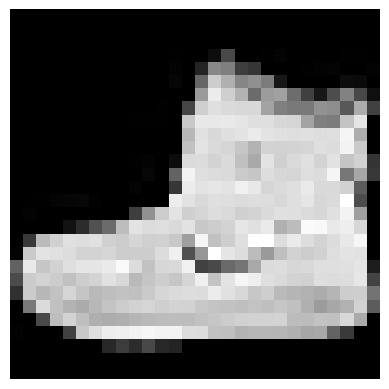

In [44]:
import matplotlib.pyplot as plt

for img, label in train_ds.take(1):
  plt.imshow(img.numpy(), cmap='gray') #convert to numpy array
plt.axis('off')
plt.grid(False)
print('label=',label.numpy())

or (if you don't want convert to numpy):

label= tf.Tensor(9, shape=(), dtype=uint8)


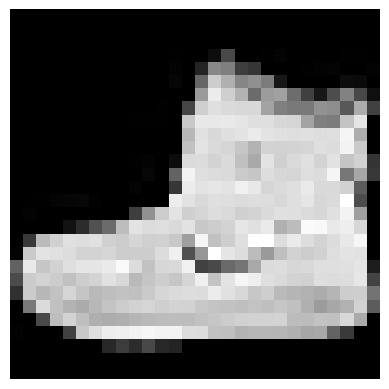

In [45]:
import matplotlib.pyplot as plt

for img, label in train_ds.take(1):
  plt.imshow(img, cmap='gray')
plt.axis('off')
plt.grid(False)
print('label=',label)


Although _``Fashion-MNIST images are grayscale and NOT BIOMEDICALS``_, we can bring them to life with colors using predefined color maps built into the matplotlib library. A **`color map`** is an array of colors used to map pixel data to actual color values.

Peruse the following URL for detailed information about matplotlib color maps:
   https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html




---
**Display the first 9 images with different colormaps**

---


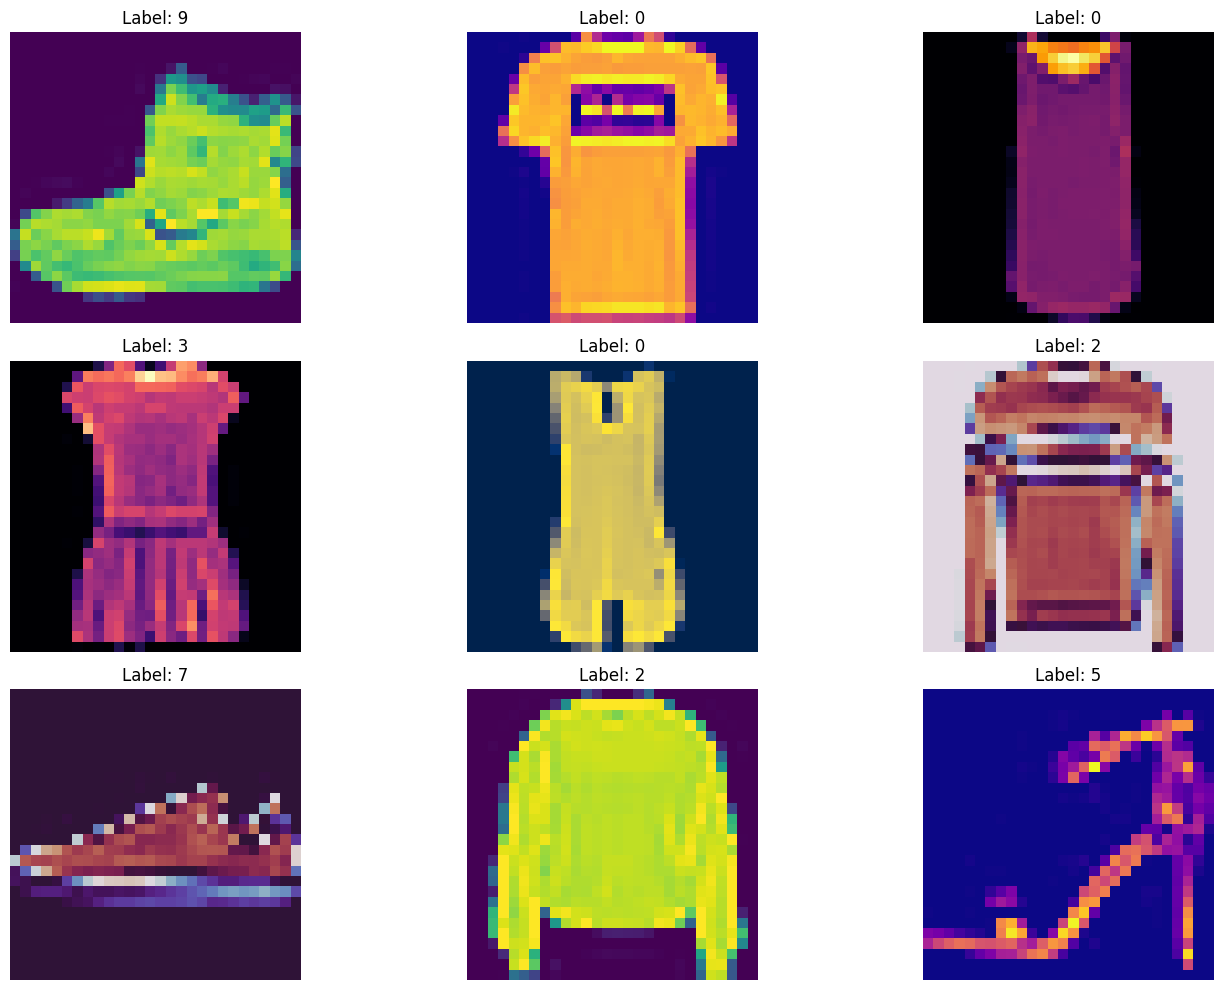

In [46]:
# Display the first 9 images with different colormaps
cmaps = ['viridis', 'plasma', 'inferno', 'magma', 'cividis', 'twilight', 'twilight_shifted']
plt.figure(figsize=(15, 10))
for i, (image, label) in enumerate(train_ds.take(9)):
    plt.subplot(3, 3, i + 1)
    plt.imshow(image.numpy(), cmap=cmaps[i % len(cmaps)])
    plt.title(f'Label: {label}')
    plt.axis('off')

plt.tight_layout()
plt.show()


---
**Define Class Labels**

---


From our experience working with [Fashion-MNIST](https://keras.io/api/datasets/fashion_mnist/), we know the ``corresponding labels ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']``:

It is preferable to have a semantic label rather than a numerical one (at least for a human).


In [47]:
class_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress',
                'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag',
                'Ankle boot']


---
**Convert a Numerical Label to a Class Label**

---

Labels are numerical in the `tf.data.Dataset` that we just loaded, but we can display the corresponding class name with the `class_labels` list we just created.


This code takes an example, display the label as a numerical value and like a string value.



In [48]:
for _, label in train_ds.take(1):
  print ('numerical label:', label.numpy())
  print ('string label:', class_labels[label.numpy()])

numerical label: 9
string label: Ankle boot


---
**Visualize some examples for train_ds**

---



Take some images and labels from the training set.

It’s always a good idea to check out the dataset to see if it is as we expect.

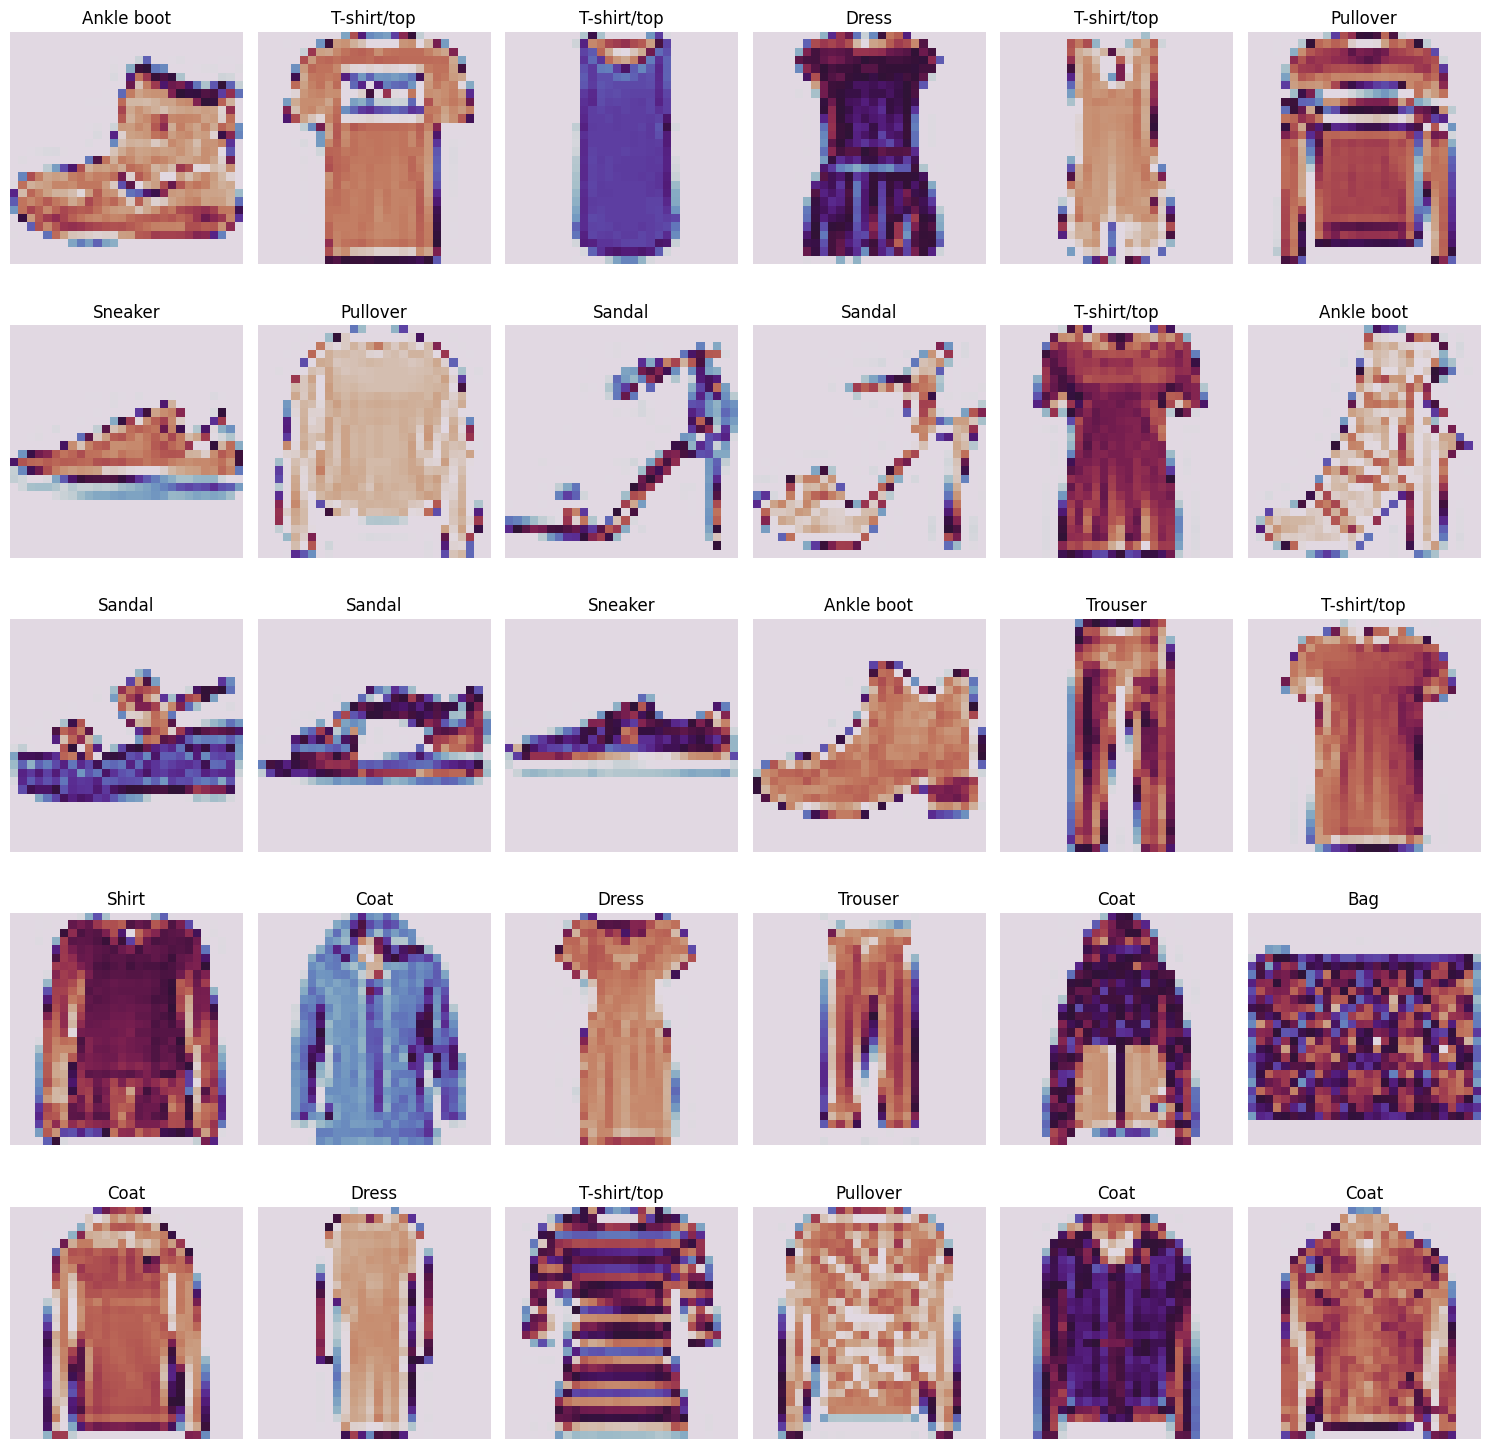

In [50]:
rows, cols = 5, 6
num = rows * cols
images=[]
labels=[]


for image, label in train_ds.take(num):
    images.append(image.numpy())
    labels.append(label.numpy())

fig, axes = plt.subplots(rows, cols, figsize=(15, 15))
for i in range(num):
    row, col = divmod(i, cols)
    #row = i // cols  # Quotient: row
    #col = i % cols   # Remainder: column
    ax = axes[row, col]
    ax.imshow(images[i], cmap='twilight',
                 interpolation='nearest')
    ax.set_title(class_labels[labels[i]])
    ax.axis('off')
plt.tight_layout()
plt.show()


### C. Setting the Pipeline (WorkFlow)



We say `pipeline` because the actual workflow starts when data is actually acquired. _`We use this terminology to emphasize the importance of transforming the training and test datasets into efficient tensors for TensorFlow model consumption`_.




#### Configure the Dataset for Best Performance



_`Use buffered prefetching and caching to improve I/O performance. Shuffle data and batching to improve model performance`_.

1. **`Prefetching`** is a function in the `tf.data API` that _**`overlaps data
preprocessing and model execution while training`**_, which **`reduces the overall training time of a model`**. To perform this operation, add the `tf.Dataset.prefetch` transformation to the input pipeline.

2. **`Caching`** add the `tf.data.Dataset.cache` transformation to the pipeline to _``keep images in memory after they’re loaded off disk during the first epoch``_, which ensures that the dataset doesn’t become a bottleneck during training. So caching saves operations (e.g., file opening, data reading) from being executed during each epoch.

3. **`Shuffling`** data serves the purpses of *``reducing variance (ensuring that a model remains general) and reducing overfitting``*. An obvious case for shuffling is when data is sorted by class (or target). We shuffle to ensure that the training, test, and validation sets are representative of the overall distribution of the data. To perform this operation, add the `tf.Dataset.shuffle` transformation to the pipeline.

4. **`Batching`**. Training is always performed on batches of training data and labels. Doing so helps the algorithm converge. _**``Batch is when all of a dataset is used to compute the gradient during one iteration``**_. _**``Mini-batch is when a subset of a dataset is used to compute the gradient during one iteration``**_. To perform this operation, add the `tf.Dataset.batch` transformation to the pipeline.



---
**Build the input pipeline:**

---

In [51]:
BATCH_SIZE = 128
SHUFFLE_SIZE = 5000

# Shuffle the training dataset with a buffer size of 5000 to ensure a good mix of data,
# then group the dataset into batches of 128 samples.
train_f = train_ds.shuffle(SHUFFLE_SIZE).batch(BATCH_SIZE)

# Cache the shuffled and batched training dataset in memory to avoid reloading it from disk in every epoch,
# and prefetch 1 batch at a time to overlap data loading with model execution, which helps in improving performance.
train_fm = train_f.cache().prefetch(1)

# Batch the test dataset into batches of 128 samples (no shuffling is needed for testing data).
test_f = test_ds.batch(BATCH_SIZE)

# Cache the batched test dataset in memory for efficient reuse,
# and prefetch 1 batch to improve loading speed during evaluation.
test_fm = test_f.cache().prefetch(1)


- _**``Batch dimension``**_. It's typically the first dimension of data tensors. _`So a tensor of shape [100, 192, 192, 3] contains 100 images of 192 × 192 pixels with three values per pixel (RGB) in each batch`_. The _**``RGB color model``**_ is an additive color model in which red, green, and blue lights are added together in various ways to reproduce a broad array of colors.

- _**``Shuffle training data``**_. Shuffling randomizes training data, which _``ensures that each data element is independent from other data elements during each training epoch``_. Learning models tend to perform best when exposed to independently sampled data.

- _**``Batch, cache, and prefetch training and test data``**_. Adding the `cache()` transformation _**``increases performance because data is read and written only once during the first epoch rather than during every epoch``**_. Adding the `prefetch(1)` transformation is a good idea because it adds efficiency to the batching process. That is, while our training algorithm is working on one batch, TensorFlow is working on the dataset in parallel to get the next batch ready. So this transformation can dramatically improve training performance.

Like other `tf.data.Dataset` methods, prefetch operates on the elements of the input dataset.

Examples:
1. Prefetch two examples with `examples.prefetch(2)`
2. Prefetch two batches with 20 examples per batch with `examples.batch(20).prefetch(2)`.

The test set is used to demonstrate how well the trained model works on examples it hasn’t seen during training. So it being shuffled is irrelevant

We set batch size and shuffle size based on trial and error experiments. You can experiment by adjusting batch and shuffle sizes.

---
**Inspect tensors**

---

In [52]:
train_fm, test_fm
print('train batches =',len(train_fm))
print(60000/128)
print('test batches =',len(test_fm))
print(10000/128)

train batches = 469
468.75
test batches = 79
78.125


---
**Display one image from one batch**

---

(128, 28, 28)
[2 9 5 3 2 1 4 7 7 5 4 6 0 7 2 5 5 5 0 0 0 6 3 3 3 9 2 3 1 1 6 7 1 1 0 3 6
 9 3 7 7 9 4 5 2 8 5 9 4 6 0 7 4 0 5 7 7 9 5 1 3 0 8 6 2 6 9 5 7 2 2 7 2 3
 6 9 3 7 6 4 9 3 2 5 5 3 6 9 1 4 6 8 2 0 7 4 1 6 9 5 2 4 2 4 1 1 8 2 3 8 7
 6 8 8 3 2 7 5 5 2 7 3 5 9 2 3 0 2]


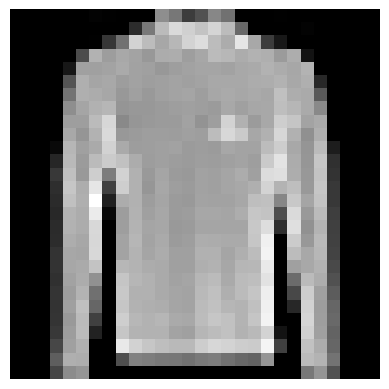

In [53]:
for img, label in train_fm.take(1):
  print(img.numpy().shape)
  print(label.numpy())
  plt.imshow(img[127,:,:], cmap='gray') # max 127 (128 = batch_size)
plt.axis('off')
plt.grid(False)

---
**Or all one batch** (for example the last complete batch (number 468))

---

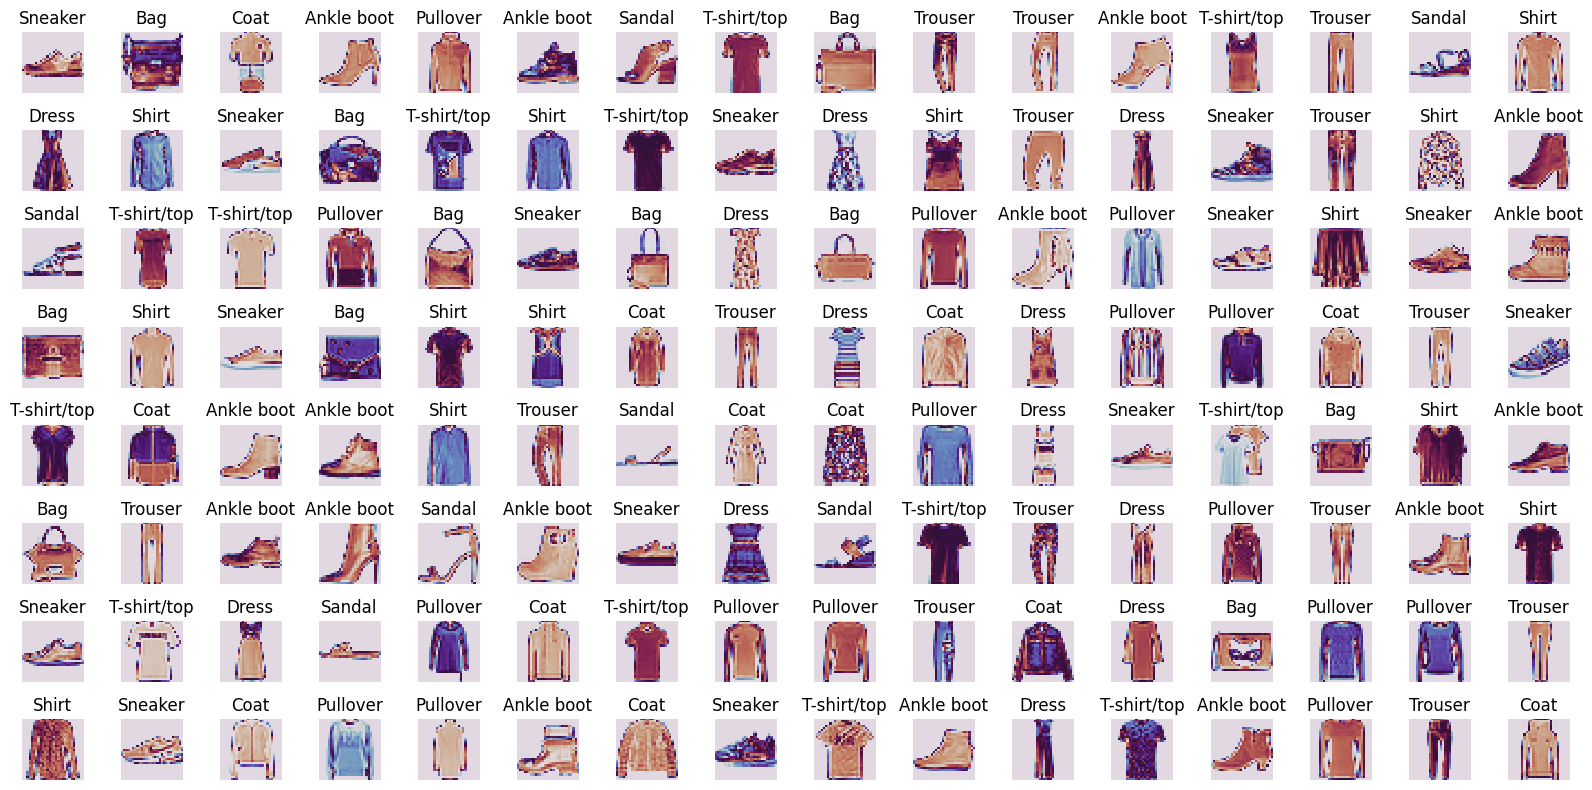

In [58]:
rows, cols = 8, 16
num = rows*cols

images, labels = next(iter(train_fm.take(468)))

fig, axes = plt.subplots(rows, cols, figsize=(16, 8))
for i in range(num):
    row, col = divmod(i, cols)
    ax = axes[row, col]
    ax.imshow(images[i], cmap='twilight',
                 interpolation='nearest')
    ax.set_title(class_labels[labels[i]])
    ax.axis('off')
plt.tight_layout()
plt.show()

### D. Build the Model



---
**Import required libraries:**

---

1. Imports The `Sequential` class:

  - **Functionality**:
      - The Sequential class is a way to build a neural network model layer by layer. It is ideal for simple stack of layers where each layer has exactly one input tensor and one output tensor.

2. Imports the `Flatten`, `Dense`,  and `Dropout` layers from the `tensorflow.keras.layers` module.

  - **Functionality**:
    
      - **`Flatten`**: This layer is used to flatten the input, i.e., _`convert a multi-dimensional input (e.g., 2D matrix) into a single-dimensional array`_. It is often used as the first layer in a model when the input is an image.
  
      - **`Dense`**: This is _`a fully connected layer where each input node is connected to each output node`_. It is used for implementing densely connected neural network layers.
          
      - **`Dropout`**: This layer is used to prevent overfitting during training by _`randomly setting a fraction of input units to 0 at each update during training time, which helps prevent overfitting`_.

3. Imports the `SparseCategoricalCrossentropy` loss function from the `tensorflow.keras.losses` module.
    
  - **Functionality**:
    
    - **`SparseCategoricalCrossentropy`**:This loss function is used for _`multi-class classification problems where the target labels are integer`. `It calculates the `[`cross-entropy`](https://www.lokad.com/es/definicion-de-entropia-cruzada/) `loss between the true labels and the predicted labels`_. The "sparse" part means that the labels are provided as integers instead of one-hot encoded vectors.
    
4. Imports the `NumPy` library and assigns it the alias `np`.
    
  - **Functionality**:
    
    - **`NumPy`**: NumPy is a _`fundamental library for scientific computing in Python`_. It provides support for arrays, matrices, and many mathematical functions to operate on these arrays efficiently. It is widely used in data manipulation and processing.



In [59]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.losses import SparseCategoricalCrossentropy
import numpy as np


---
**Create the [sequential model](https://keras.io/guides/sequential_model/):**

---

In [60]:
model_1 = Sequential([
  Flatten(input_shape=img_shape),
  Dense(128, activation='relu'),
  Dropout(0.4),
  Dense(10, activation=None)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


or in this way:

In [61]:
model = Sequential()
model.add(Flatten(input_shape=img_shape))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation=None))

The _`basic building block of a neural network is the layer`_.

  - **``Layers``** extract representations from the data fed into them. Hopefully, these representations are meaningful for the problem at hand.
  - Most of deep learning consists of _**``chaining together simple layers``**_.
  - Most layers, such as *Dense*, have _**``parameters that are learned during training``**_.

1. The first layer in this network is a *`Flatten`* layer, which _`transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array
(of 28 * 28 = 784 pixels)`_. Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn because it only reformats the data.

2. After the pixels are flattened, the network consists of a sequence of two Dense layers. _`Dense layers are fully connected neural layers, which means that all the neurons in a layer are connected to all neurons in the next layer`_.

    2.1. The _`first Dense layer has 128 nodes`_ (or neurons).
  
    2.2. _`The second (and last) layer returns a logits array with length of 10`_. **Logits** are the outputs of a layer of neurons before the activation function is applied. Each node contains a score that indicates that the current image belongs to one of the ten classes.

3. We add a **`Dropout`** layer after the first Dense layer to reduce overfitting. **Dropout** is a _`regularization method`_. During training, _`some number of layer outputs (nodes) are randomly ignored or “dropped out,`_ which has the effect of making the layer look like and be treated _`like a layer with a different number of nodes
and connectivity to the prior layer`_.



---
**Inspect the model:**

---

We create a model table to visualize the model.

In [62]:
model_1.summary()
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)


Or plot like a graph.

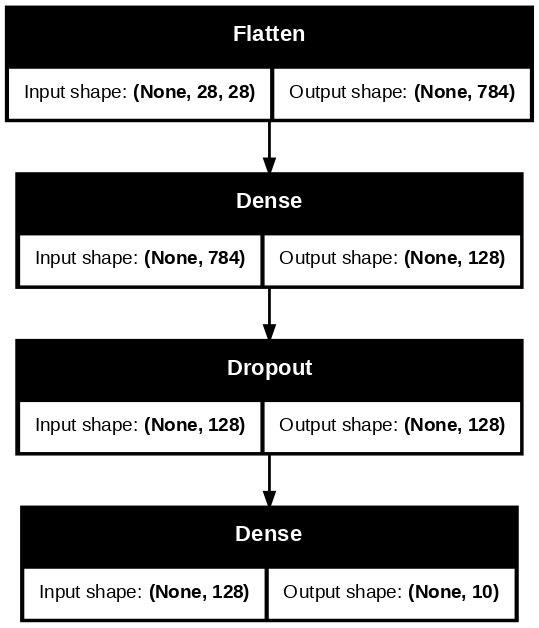

In [63]:
# example of a multilayer perceptron
from tensorflow.keras.utils import plot_model

plot_model(model,
           to_file='multilayer_perceptron_graph.png',
           show_shapes=True,
           dpi=100)

### E. Train the Model (compile and fit)





Compile the model with [`SparseCategoricalCrossentropy` loss](https://www.tensorflow.org/api_docs/python/tf/keras/losses/sparse_categorical_crossentropy)
 . Sparse categorical cross- entropy _``performs well when classes are mutually exclusive``_. That is, each sample belongs exactly to one class. An advantage of using sparse categorical cross-entropy is that it _``saves time in memory as well as computation because it uses a single integer for a class rather than a whole vector (hot-encoded)``_.

The *`from_logits=True`* attribute informs the loss function that the output values generated by the model are not normalized. _`That is, the softmax function has not been applied on them to produce a probability distribution`_.

#### **Softmax**
The softmax function takes a vector of real numbers $ z = [z_1, z_2, ..., z_n] $ and converts it into probabilities $ p = [p_1, p_2, ..., p_n] $, where each $ p_i $ is in the range $ [0, 1] $ and the sum of all $ p_i $ equals 1. The formula is:

$$
p_i = \frac{e^{z_i}}{\sum_{j=1}^{n} e^{z_j}}
$$

Where:
- $ p_i $ is the probability corresponding to class $ i $.
- $ z_i $ is the input value (logit) corresponding to class $ i $.
- $ e^{z_i} $ is the exponential of the logit $ z_i $, ensuring that the resulting values are positive.
- $ \sum_{j=1}^{n} e^{z_j} $ is the sum of all the exponentials of the logits, normalizing the values so that the sum of the probabilities is 1.

#### **Softmax Example in Python**:

Consider a neural network's final layer with 3 outputs:

```python
logits = [2.0, 1.0, 0.1]
```

$$
z = [2.0, 1.0, 0.1]
$$

These logits can be converted to probabilities using softmax.

```python
import numpy as np

probabilities = np.exp(logits) / np.sum(np.exp(logits))
```
Now, applying the softmax function:

1. Compute the exponential of each logit:
   $$
   e^{2.0} \approx 7.389, \quad e^{1.0} \approx 2.718, \quad e^{0.1} \approx 1.105
   $$

2. Sum the exponential values:
   $$
   7.389 + 2.718 + 1.105 = 11.212
   $$

3. Finally, divide each exponential by the total sum to obtain the probabilities:
   $$
   p_1 = \frac{7.389}{11.212} \approx 0.659, \quad p_2 = \frac{2.718}{11.212} \approx 0.242, \quad p_3 = \frac{1.105}{11.212} \approx 0.099
   $$

Thus, the softmax function converts the logits `[2.0, 1.0, 0.1]` into a probability distribution `[0.659, 0.242, 0.099]`.

#### **Further Reading**:

You can learn more about logits and their role in neural networks from the following sources:
- [Logits in TensorFlow Documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sparse_softmax_cross_entropy_with_logits)
- [Understanding Logits and Softmax](https://developers.google.com/machine-learning/crash-course/multi-class-neural-networks/softmax)


---
**Compile the model**

---

In [ ]:
model.compile(optimizer='adam',
  loss=SparseCategoricalCrossentropy(from_logits=True), # apply automaticaly softmax activation
  metrics=['accuracy'])

---
**Fit the model (train and validate)**

---

The model is going to train with ten epochs.
1. `The number of epochs is the number of times the learning algorithm works through the entire training dataset`.
2. `Loss and accuracy are saved for training and test data`.
3. `Training loss and accuracy are based on what the model learned during training`.
4. `Test loss and accuracy are based on new data that the model hasn’t learned upon`. So the closer test accuracy is to training accuracy, the more generalizable the model. Of course, we want to have high test accuracy and low test loss.

In [ ]:
epochs = 10
history = model.fit(train_fm, epochs=epochs,
                    verbose=1, validation_data=test_fm)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6983 - loss: 0.8781 - val_accuracy: 0.8361 - val_loss: 0.4648
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8348 - loss: 0.4723 - val_accuracy: 0.8504 - val_loss: 0.4207
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8500 - loss: 0.4262 - val_accuracy: 0.8583 - val_loss: 0.3998
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8595 - loss: 0.3985 - val_accuracy: 0.8643 - val_loss: 0.3779
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8619 - loss: 0.3830 - val_accuracy: 0.8626 - val_loss: 0.3787
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8669 - loss: 0.3691 - val_accuracy: 0.8701 - val_loss: 0.3631
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8696 - loss: 0.3602 - val_accuracy: 0.8679 - val_loss: 0.3645
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8728 - loss: 0.3485 - val_accuracy: 0.


---
**Visualize the training and validation loss and accuracy on separate plots using matplotlib**

---

To visualize the training history with matplotlib, _`you can access the training and validation data stored in the history object returned by the ` `fit()` `method in Keras`_. The history object contains the loss and metric values for each epoch of training.

In this code:

The loss and accuracy values for both training and validation are extracted from the history object.
These values are used to plot the loss and accuracy curves for both training and validation on separate plots.
`plt.subplot()` is used to organize the plots into a single figure.
_`These plots allow you to visualize how the loss and accuracy change over epochs for both the training and validation sets. This can help you evaluate the performance and generalization of your model during training`_.

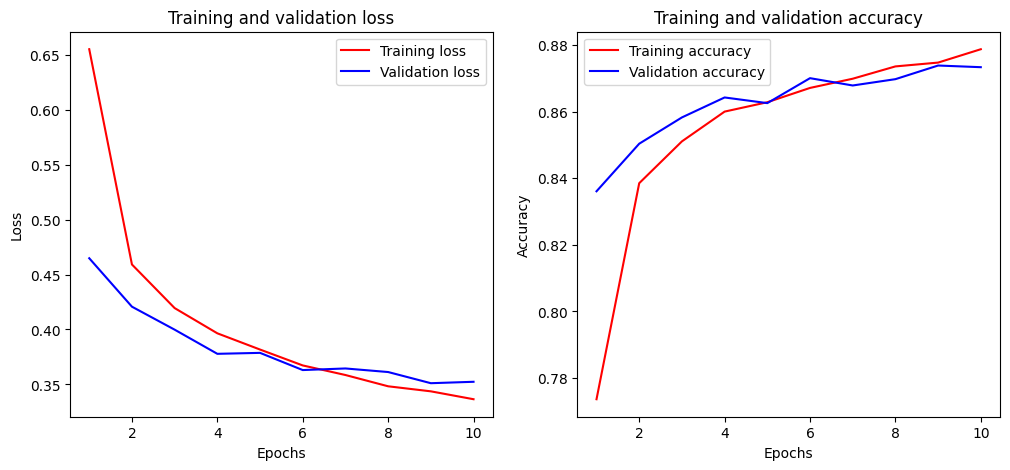

In [ ]:
import matplotlib.pyplot as plt

# Get the training and validation loss and accuracy from the history
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)

# Plot the loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot the accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


### F. Evaluate



---
**Evaluate the model**

---


To evaluate the model with the **test set** and visualize its performance, _`you can use the evaluate() method in Keras to compute the loss and metrics on the test data`_. Then, you can plot the results using matplotlib.

This code snippet will evaluate the trained model on the test set, print the test loss and accuracy, and then plot them using a bar plot. _`The red bar represents the test loss, and the blue bar represents the test accuracy`_. This visualization provides a quick overview of the model's performance on the test data.


Test Loss: 0.35243481397628784
Test Accuracy: 0.8733999729156494


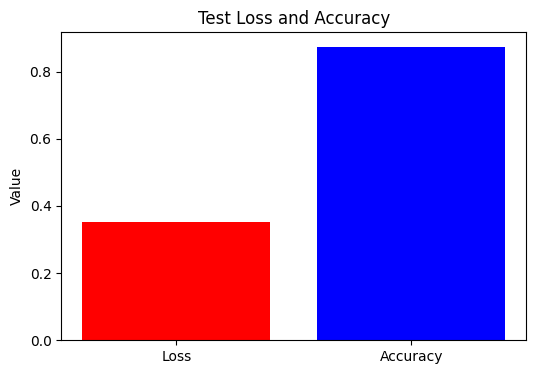

In [ ]:
import matplotlib.pyplot as plt

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_fm, verbose=0)

# Print the test loss and accuracy
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Plot the test data
plt.figure(figsize=(6, 4))
plt.bar(['Loss', 'Accuracy'], [test_loss, test_accuracy], color=['red', 'blue'])
plt.title('Test Loss and Accuracy')
plt.ylabel('Value')
plt.show()



#### What is a [Confusion Matrix](https://wiki.cloudfactory.com/docs/mp-wiki/metrics/confusion-matrix)?



---
**Generate a confusion matrix using scikit-learn**

---


A **confusion matrix** is a specific table layout that *`allows visualization of the performance of an algorithm`*, typically a supervised learning one. It is particularly useful for _`measuring the performance of a classification model`_. The Confusion Matrix shows _`how your classification model is confused when it makes predictions`_.

##### Structure of a Confusion Matrix

A confusion matrix for a `binary classifier` is a 2x2 matrix that looks like this:

```
               Predicted Positive    Predicted Negative
Actual Positive        TP                   FN
Actual Negative        FP                   TN
```

- **`True Positive (TP)`**: The model correctly predicts the positive class.
- **`True Negative (TN)`**: The model correctly predicts the negative class.
- **`False Positive (FP)`**: The model incorrectly predicts the positive class (Type I error).
- **`False Negative (FN)`**: The model incorrectly predicts the negative class (Type II error).

For `multiclass classification`, the confusion matrix extends to an NxN matrix, where N is the number of classes. `Each cell in the matrix represents the number of instances of the actual class that were predicted as the corresponding class`.



#### Interpretation of a Confusion Matrix



##### Binary Classification


- **True Positives (TP)**: High values indicate that the model correctly identifies a large number of positive instances.
- **True Negatives (TN)**: High values indicate that the model correctly identifies a large number of negative instances.
- **False Positives (FP)**: High values indicate that the model incorrectly identifies a large number of negative instances as positive.
- **False Negatives (FN)**: High values indicate that the model incorrectly identifies a large number of positive instances as negative.

From these values, several key metrics can be derived:

- **`Accuracy`**: The proportion of the total number of predictions that were correct.

  $$ \text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN} $$

- **`Precision`**: The proportion of positive identifications that were actually correct.

  $$ \text{Precision} = \frac{TP}{TP + FP} $$

- **`Recall (Sensitivity)`**: The proportion of actual positives that were correctly identified.

  $$ \text{Recall} = \frac{TP}{TP + FN} $$

- **`F1 Score`**: The harmonic mean of precision and recall, providing a balance between the two.

  $$ \text{F1 Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} $$


##### Multiclass Classification

For multiclass classification, the confusion matrix is larger, but the interpretation is similar:

- The `diagonal elements` represent the number of times a class was correctly predicted.
- The `off-diagonal elements` represent errors – where the actual class is in the rows and the predicted class is in the columns.



##### Example of Interpretation for Multiclass Classification

Consider the following confusion matrix for a model that classifies images of clothing:

```
               Predicted
               T-Shirt  Trouser  Pullover  Dress  Coat  Sandal  Shirt  Sneaker  Bag  Ankle boot
Actual T-Shirt     827       3        12      18     5     1       124    0       10     0
       Trouser      3       963       1       23     5     0       3      0       2      0
       Pullover     13      3        795     12    107   0       71     0       2      0
       Dress        23      8        9       895    28   0       33     0       4      0
       Coat         0       1        106     41    780   0       70     0       2      0
       Sandal       0       0        0       4     0     965     19     2       14     0
       Shirt        110     1        88      31    76    0       683    0       11     0
       Sneaker      0       0        0       0     35    0       936    1       28     0
       Bag          1       0        5       6     4     4       8      3       969    0
       Ankle boot   0       0        0       0     11    1       36     0       952    0
```

- **Diagonal Elements**: These represent _``correct classifications``_ (e.g., 827 T-Shirts were correctly classified as T-Shirts).
- **Off-Diagonal Elements**: These represent _``misclassifications``_ (e.g., 124 T-Shirts were incorrectly classified as Shirts).

From the confusion matrix, _`you can calculate the performance metrics (accuracy, precision, recall, and F1 score) for each class and overall model performance`_.



##### Conclusion

A confusion matrix provides a comprehensive overview of a model's performance, revealing not only the number of correct and incorrect predictions but also the specific classes that are being confused. This detailed insight can guide further model refinement and tuning.

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Length of y_true: 10000
Length of y_pred_classes: 10000
Unique values in y_true: [0 1 2 3 4 5 6 7 8 9]
Unique values in y_pred_classes: [0 1 2 3 4 5 6 7 8 9]


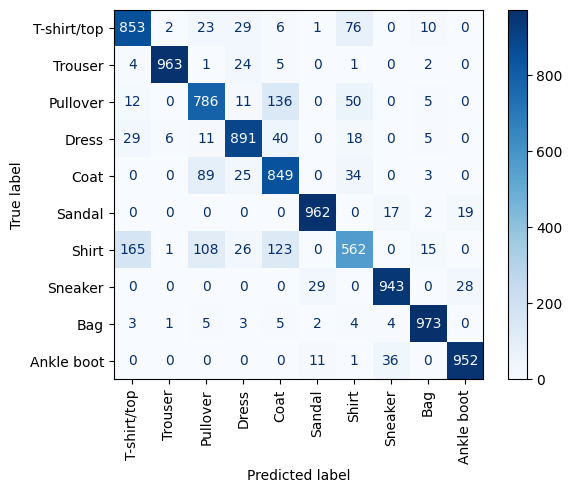

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = model.predict(test_fm)
y_pred_classes = np.argmax(y_pred, axis=1)  # Use argmax to get the class with the highest probability

# Get true labels
y_true = np.concatenate([y.numpy() for x, y in test_fm], axis=0)

# Print lengths to confirm they match
print("Length of y_true:", len(y_true))
print("Length of y_pred_classes:", len(y_pred_classes))

# Check unique values
print("Unique values in y_true:", np.unique(y_true))
print("Unique values in y_pred_classes:", np.unique(y_pred_classes))

# Define class labels
class_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=90)
plt.show()

#### What is a [ROC Curve](https://wiki.cloudfactory.com/docs/mp-wiki/metrics/precision-recall-curve-and-auc-pr)?


---
**Create a Multiclass Roc Curve**

---


A **ROC (Receiver Operating Characteristic) curve** is a graphical tool used to *`evaluate the performance of a binary classifier`*. The ROC curve _**`displays the relationship between the True Positive Rate (TPR) and the False Positive Rate (FPR) at various classification thresholds`**_.

- **TPR (or Sensitivity or Recall)**: The proportion of actual positives correctly identified by the model. It is calculated as:

  $$ \text{TPR} = \frac{\text{TP}}{\text{TP} + \text{FN}} $$

- **FPR**: The proportion of actual negatives incorrectly identified as positives. It is calculated as:

  $$ \text{FPR} = \frac{\text{FP}}{\text{FP} + \text{TN}} $$



#### Interpreting a ROC Curve

- **`Diagonal`**: _**`A ROC curve that follows the diagonal from the point (0,0) to the point (1,1) indicates a random classifier`**_, meaning its ability to discriminate between classes is no better than a random guess.
- **`Area Under the Curve (AUC)`**: The area under the ROC curve (AUC) provides a single value summary of the classifier's performance. _**`An AUC of 0.5 indicates random performance, while an AUC of 1.0 indicates perfect classification`**_.
- **`Top Left Corner (0,1)`**: A classifier that approaches this point _**`is desirable as it indicates a high true positive rate and a low false positive rate`**_.

##### ROC Curve for Multiclass Classification

`For multiple classes, the situation is more complex because ROC was originally designed for binary problems`. However, several approaches can adapt it to multiclass problems:

1. **`One-vs-Rest (OvR)`**: This approach binarizes the classes, i.e., computes a ROC curve for each class by treating that class as positive and all other classes as negative.

2. **`Micro-averaging and Macro-averaging`**:
   - **Micro-averaging**: Calculates metrics considering each classification instance individually (treating all classes together).
   - **Macro-averaging**: Calculates metrics for each class separately and then takes the average of these metrics.

##### Example Interpretation of a Multiclass ROC Curve

`In the One-vs-Rest approach, for each class, we obtain a ROC curve that shows how well the model can distinguish that class from all the other classes`. A ROC curve closer to the top left corner indicates better performance for that particular class.

##### Example Code for Multiclass ROC Curve

We have already covered how to compute and plot multiclass ROC curves using the One-vs-Rest approach in the code provided. Here is a summary of the process:

```python
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Binarize the labels
n_classes = len(class_labels)
val_labels_binarized = label_binarize(val_labels, classes=range(n_classes))

# Predict probabilities for the validation set and calculate ROC and AUC for each class
y_pred_prob = model.predict(val_images)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(val_labels_binarized[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure()
colors = ['aqua', 'darkorange', 'cornflowerblue', 'red', 'green', 'purple', 'brown', 'pink', 'gray', 'olive']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(class_labels[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Each Class')
plt.legend(loc='lower right')
plt.show()
```

##### Interpretation of the Multiclass ROC Curve Example

In the resulting plot, `each colored line represents the ROC curve for a specific class`. The legend indicates the area under the curve (AUC) for each class, helping to compare the model's performance across different classes. `A higher AUC for a specific class indicates better model performance for that particular class`.


Shape of val_images: (10000, 28, 28)
Shape of val_labels: (10000,)
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


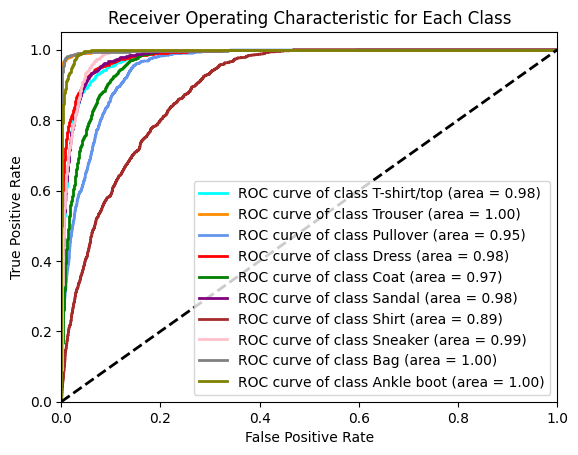

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# Extract images and labels from test_fm
val_images = []
val_labels = []

for images, labels in test_fm:
    val_images.append(images.numpy())
    val_labels.append(labels.numpy())

val_images = np.concatenate(val_images, axis=0)
val_labels = np.concatenate(val_labels, axis=0)

print("Shape of val_images:", val_images.shape)
print("Shape of val_labels:", val_labels.shape)

# Binarize the labels
n_classes = len(class_labels)
val_labels_binarized = label_binarize(val_labels, classes=range(n_classes))

# Predict probabilities for the validation set and calculate ROC and AUC for each class
y_pred_prob = model.predict(val_images)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(val_labels_binarized[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure()
colors = ['aqua', 'darkorange', 'cornflowerblue', 'red', 'green', 'purple', 'brown', 'pink', 'gray', 'olive']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(class_labels[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Each Class')
plt.legend(loc='lower right')
plt.show()


## `NOTEBOOK PRACTICE 3`

---
Focus in point 5. Modify the notebook as necessary to enhance the performance parameters of the model you create. Use a metric that combines various partial metrics to demonstrate that your model performs better than the baseline model shown in this notebook. You can make changes in the following areas:

---

### Instructions to Improve the Notebook:

ChatGPT can be a great ally. Use it for your convenience.



1. **Data Preprocessing**:
   - Enhance data preprocessing by normalizing the data and handling missing values.
   - For curiosity (this is optative), you may explore Data Augmentation in `Tensorflow`, although it will be covered in later lectures (study it independently for now).

2. **Model Architecture**:
   - Modify the architecture of the model.
   - Experiment with different layers, activation functions, or network structures (excluding Convolutional Neural Networks as they will be discussed in later lectures).
   - Consider using deeper networks for experimentation.

3. **Training Parameters**:
   - Tune training parameters such as learning rate, batch size, number of epochs, and optimization algorithms (e.g., Adam, SGD).

4. **Regularization Techniques**:
   - Apply regularization techniques like dropout and L1/L2 regularization to prevent overfitting.

5. **Cross-Validation**:
   - Use cross-validation to ensure that the model generalizes well to unseen data.

6. **Evaluation Metrics**:
   - Use combined metrics such as the F1 score, Precision-Recall AUC, or Matthews Correlation Coefficient (MCC) to obtain a more comprehensive evaluation of the model's performance.(Study it independently for now.)
   - Learn more about Matthews Correlation Coefficient here: [scikit-learn - Matthews Correlation Coefficient](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.matthews_corrcoef.html).

7. **Hyperparameter Tuning** (*optative*):
   - Perform hyperparameter tuning using GridSearchCV or RandomizedSearchCV.

By following these instructions and answering the questions, we will gain hands-on experience in improving model performance and understanding the importance of different machine learning techniques.

Feel free to modify and adapt the exercise as needed to suit your learning objectives and preferences.

Happy coding!